In [32]:
import os
import numpy as np
from scipy.stats import kde
import matplotlib.pyplot as plt

In [2]:
from astropy.io import fits
from astropy.table import Table

In [3]:
import seaborn as sns

In [4]:
plt.style.use('seaborn-talk')
%matplotlib inline

In [5]:
legacyhalos_dir = os.getenv('LEGACYHALOS_DIR')

In [6]:
parentfile = os.path.join(legacyhalos_dir, 'legacyhalos-parent-isedfit.fits')

In [7]:
ls = Table(fits.getdata(parentfile, extname='LSPHOT-ISEDFIT'))
ls

ISEDFIT_ID,RA,DEC,Z,MAGGIES [5],IVARMAGGIES [5],BESTMAGGIES [5],CHUNKINDX,MODELINDX,DELAYED,BURSTTYPE,CHI2,TOTALMASS,TOTALMASS_ERR,MSTAR,AGE,SFRAGE,TAU,ZMETAL,AV,MU,OIIIHB,NLYC,SFR,SFR100,B100,B1000,EWOII,EWOIIIHB,EWNIIHA,NBURST,TRUNCTAU,TBURST,DTBURST,FBURST,MSTAR_50,AGE_50,SFRAGE_50,TAU_50,ZMETAL_50,AV_50,MU_50,OIIIHB_50,SFR_50,SFR100_50,B100_50,B1000_50,EWOII_50,EWOIIIHB_50,EWNIIHA_50,MSTAR_AVG,AGE_AVG,SFRAGE_AVG,TAU_AVG,ZMETAL_AVG,AV_AVG,MU_AVG,OIIIHB_AVG,SFR_AVG,SFR100_AVG,B100_AVG,B1000_AVG,EWOII_AVG,EWOIIIHB_AVG,EWNIIHA_AVG,MSTAR_ERR,AGE_ERR,SFRAGE_ERR,TAU_ERR,ZMETAL_ERR,AV_ERR,MU_ERR,OIIIHB_ERR,SFR_ERR,SFR100_ERR,B100_ERR,B1000_ERR,EWOII_ERR,EWOIIIHB_ERR,EWNIIHA_ERR
int32,float64,float64,float32,float32,float32,float32,int16,int16,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
0,197.872957171,-1.34111627953,0.185414,5.00785e-08 .. 2.21488e-07,1.15526e+18 .. 4.46958e+16,5.08124e-08 .. 2.21255e-07,0,2949,1,1,1.33128,5.31172e+11,4.5221e+09,11.4891,10.9956,8.07458,1.48559,0.029805,0.378849,0.263466,-1.0,53.2745,0.208484,-0.646138,-2.33015,-2.19052,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,11.4662,8.51098,6.97519,0.711074,0.0248745,0.462265,0.311521,-1.0,-0.855237,-1.86109,-3.62834,-3.34263,-1.0,-1.0,-1.0,11.4546,8.15458,6.74547,0.710303,0.0234894,0.547836,0.348979,-1.0,-1.4257,-2.06146,-6.11301,-5.76807,-1.0,-1.0,-1.0,0.0635347,1.67546,1.46926,0.36593,0.0045493,0.351594,0.184114,0.0,0.950641,0.743666,3.20881,3.2455,0.0,0.0,0.0
1,322.109584838,1.60087170515,0.377297,3.06185e-08 .. 4.48406e-07,2.24214e+18 .. 1.00086e+16,3.10957e-08 .. 4.34963e-07,1,3589,1,1,6.02113,4.31096e+12,3.826e+10,12.395,9.34372,9.04094,0.15139,0.0168967,0.8088,0.0829718,-1.0,52.2976,-2.36543,-2.36543,-15.0,-15.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,12.3731,8.74005,8.07481,0.202541,0.0168967,0.397066,0.298276,-1.0,-2.37707,-2.38526,-15.0,-14.5915,-1.0,-1.0,-1.0,12.3638,8.44751,7.91654,0.265572,0.0172581,0.439794,0.331303,-1.0,-2.15906,-2.29522,-11.9254,-11.5981,-1.0,-1.0,-1.0,0.0389223,0.797756,0.838817,0.208491,0.00387679,0.336824,0.205287,0.0,0.650616,0.410409,2.88377,2.94873,0.0,0.0,0.0
2,180.105619884,3.34699851009,0.138051,7.07144e-07 .. 2.4304e-06,5.88437e+15 .. 4.88641e+14,7.12075e-07 .. 2.41278e-06,1,1285,1,1,0.181923,3.14265e+12,2.90297e+10,12.2668,6.5108,6.42617,0.0423135,0.0283783,0.165325,0.43125,-1.0,52.0066,-2.5027,-2.5027,-15.0,-15.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,12.3264,8.6735,7.53779,0.536423,0.0230646,0.610515,0.370696,-1.0,-1.69873,-2.35472,-5.44249,-5.03989,-1.0,-1.0,-1.0,12.3162,8.53783,7.37207,0.585216,0.0219018,0.697269,0.396253,-1.0,-1.21141,-1.72056,-7.36233,-6.94335,-1.0,-1.0,-1.0,0.0632503,1.88138,1.71877,0.342073,0.00546516,0.487587,0.183588,0.0,0.918536,0.707991,3.15987,3.19974,0.0,0.0,0.0
3,328.403462169,17.6954792288,0.250766,1.13928e-07 .. 4.60717e-07,2.23228e+17 .. 1.22486e+16,1.10689e-07 .. 4.52151e-07,4,544,1,1,2.21791,1.629e+12,1.36404e+10,11.9751,10.1718,6.85384,1.7492,0.0292997,0.0511064,0.424779,-1.0,54.2724,1.20948,0.457395,-1.74713,-1.62957,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,11.953,9.24271,5.94222,1.69787,0.0266514,0.57044,0.326247,-1.0,1.34654,0.629769,-1.62225,-1.47629,-1.0,-1.0,-1.0,11.9449,8.90118,5.80499,1.67673,0.0251068,0.659332,0.371263,-1.0,1.35634,0.640618,-1.59681,-1.46735,-1.0,-1.0,-1.0,0.0387821,1.21666,0.822009,0.33941,0.00450618,0.443987,0.194815,0.0,0.138969,0.175285,0.184663,0.167615,0.0,0.0,0.0
4,213.600241851,-0.377643773856,0.134773,9.53615e-09 .. 1.63733e-07,2.56833e+19 .. 7.87581e+

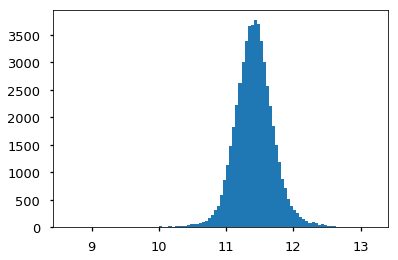

In [22]:
_ = plt.hist(ls['MSTAR_AVG'], bins=100)

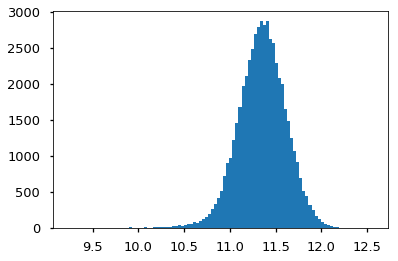

In [23]:
_ = plt.hist(sdss['MSTAR_AVG'], bins=100)

(-0.5, 0.5)

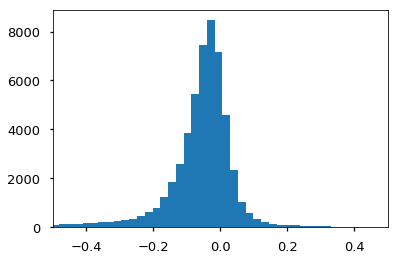

In [27]:
_ = plt.hist(sdss['MSTAR_AVG'] - ls['MSTAR_AVG'], bins=200)
plt.xlim(-0.5, 0.5)

In [8]:
sdss = Table(fits.getdata(parentfile, extname='SDSSPHOT-ISEDFIT'))
sdss

ISEDFIT_ID,RA,DEC,Z,MAGGIES [7],IVARMAGGIES [7],BESTMAGGIES [7],CHUNKINDX,MODELINDX,DELAYED,BURSTTYPE,CHI2,TOTALMASS,TOTALMASS_ERR,MSTAR,AGE,SFRAGE,TAU,ZMETAL,AV,MU,OIIIHB,NLYC,SFR,SFR100,B100,B1000,EWOII,EWOIIIHB,EWNIIHA,NBURST,TRUNCTAU,TBURST,DTBURST,FBURST,MSTAR_50,AGE_50,SFRAGE_50,TAU_50,ZMETAL_50,AV_50,MU_50,OIIIHB_50,SFR_50,SFR100_50,B100_50,B1000_50,EWOII_50,EWOIIIHB_50,EWNIIHA_50,MSTAR_AVG,AGE_AVG,SFRAGE_AVG,TAU_AVG,ZMETAL_AVG,AV_AVG,MU_AVG,OIIIHB_AVG,SFR_AVG,SFR100_AVG,B100_AVG,B1000_AVG,EWOII_AVG,EWOIIIHB_AVG,EWNIIHA_AVG,MSTAR_ERR,AGE_ERR,SFRAGE_ERR,TAU_ERR,ZMETAL_ERR,AV_ERR,MU_ERR,OIIIHB_ERR,SFR_ERR,SFR100_ERR,B100_ERR,B1000_ERR,EWOII_ERR,EWOIIIHB_ERR,EWNIIHA_ERR
int32,float64,float64,float32,float32,float32,float32,int16,int16,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
0,197.872957171,-1.34111627953,0.185414,6.05007e-09 .. 6.832e-07,1.29408e+17 .. 4.50838e+15,2.57324e-08 .. 6.75015e-07,4,1763,1,1,11.6869,1.00362e+12,8.55873e+09,11.7896,3.53645,3.1555,0.190476,0.0284883,0.451959,0.398725,-1.0,51.3949,-2.99843,-2.99843,-6.67556,-5.23694,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,11.9484,6.61431,5.91871,0.370501,0.0210389,0.451959,0.328073,-1.0,-2.52244,-2.71796,-6.02899,-5.27601,-1.0,-1.0,-1.0,11.9429,6.94258,6.12414,0.409902,0.0203152,0.552173,0.35529,-1.0,-1.79591,-2.28182,-7.98549,-7.48653,-1.0,-1.0,-1.0,0.0766208,1.90872,1.76601,0.268071,0.00536668,0.40933,0.166081,0.0,0.857731,0.631545,3.0561,3.12917,0.0,0.0,0.0
1,322.109584838,1.60087170515,0.377297,1.65759e-10 .. 1.42137e-07,2.67116e+18 .. 5.32733e+16,4.34928e-10 .. 1.40297e-07,0,2676,1,1,0.59082,1.36674e+12,1.44146e+10,11.8977,9.33731,8.92531,0.205998,0.0261438,0.349744,0.255705,-1.0,51.7074,-2.86432,-2.86432,-15.0,-15.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,11.8545,7.94424,7.15031,0.341337,0.0262411,0.559507,0.347916,-1.0,-2.88527,-2.89477,-8.26328,-7.64433,-1.0,-1.0,-1.0,11.8405,7.73126,7.00032,0.365757,0.0250025,0.637231,0.387192,-1.0,-2.34542,-2.64872,-9.38745,-8.94905,-1.0,-1.0,-1.0,0.0563841,1.11529,1.14116,0.223455,0.00362472,0.375233,0.169571,0.0,0.765435,0.531441,2.98425,3.03769,0.0,0.0,0.0
2,180.105619884,3.34699851009,0.138051,7.78488e-08 .. 1.82298e-06,4.66563e+16 .. 8.48853e+14,8.44076e-08 .. 1.82965e-06,4,2752,1,1,0.62404,2.28493e+12,1.81107e+10,12.1344,5.11646,4.56861,0.273925,0.0144442,1.68542,0.386608,-1.0,51.9734,-2.64113,-2.64113,-6.75886,-5.8289,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,12.1985,8.02954,6.90462,0.490434,0.0213397,0.739246,0.413913,-1.0,-1.83664,-2.45977,-5.49851,-5.0767,-1.0,-1.0,-1.0,12.1885,7.97958,6.90056,0.54144,0.0206915,0.822106,0.438794,-1.0,-1.33021,-1.8417,-7.29762,-6.82727,-1.0,-1.0,-1.0,0.0770879,2.03939,1.85914,0.340607,0.00554476,0.455287,0.197316,0.0,0.912997,0.699275,3.14666,3.19324,0.0,0.0,0.0
3,328.403462169,17.6954792288,0.250766,2.16156e-08 .. 3.33913e-07,2.24785e+17 .. 1.96403e+16,2.3064e-08 .. 3.26738e-07,3,2007,1,1,3.01528,1.10176e+12,9.42575e+09,11.8044,8.56453,5.43111,1.71985,0.0288441,0.92996,0.355547,-1.0,54.4063,1.3441,0.659572,-1.44981,-1.33014,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,11.8253,9.17387,5.69139,1.80503,0.0247717,0.859372,0.463422,-1.0,1.33192,0.649826,-1.47011,-1.33606,-1.0,-1.0,-1.0,11.8156,8.71518,5.50485,1.80255,0.0231512,1.00042,0.476008,-1.0,1.34708,0.668284,-1.45632,-1.33298,-1.0,-1.0,-1.0,0.0434017,1.27828,0.897768,0.524406,0.00549433,0.552225,0.158835,0.0,0.208503,0.286337,0.280205,0.253759,0.0,0.0,0.0
4,213.600241851,-0.377643773856,0.134773,4.63871e-08 .. 1.07323e-06,1.15422e+17 

In [33]:
data = np.vstack( (ls['MSTAR_AVG'], sdss['MSTAR_AVG'] - ls['MSTAR_AVG']))
data.shape

(2, 53441)

In [34]:
k = kde.gaussian_kde(data.T)
#xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
#zi = k(np.vstack([xi.flatten(), yi.flatten()]))

KeyboardInterrupt: 

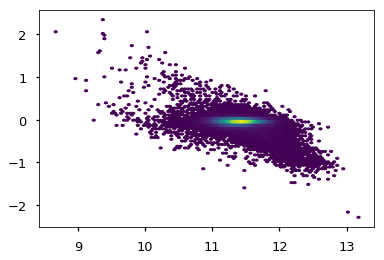

In [18]:
fig, ax = plt.subplots()
ax.hexbin(ls['MSTAR_AVG'], sdss['MSTAR_AVG'] - ls['MSTAR_AVG'],
          mincnt=1)

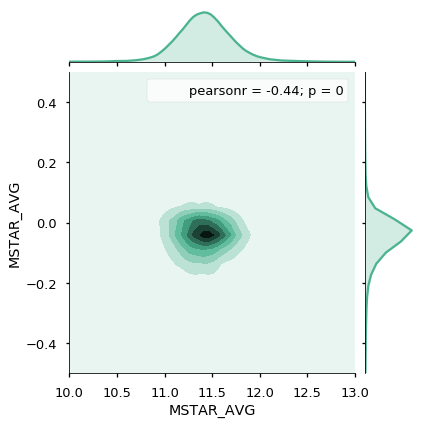

In [28]:
sns.jointplot(ls['MSTAR_AVG'], sdss['MSTAR_AVG'] - ls['MSTAR_AVG'], 
              kind="kde", color="#4CB391", xlim=(10, 13), ylim=(-0.5, 0.5))

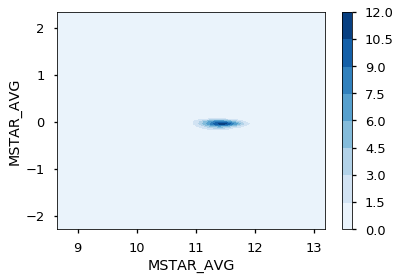

In [31]:
sns.kdeplot(ls['MSTAR_AVG'], sdss['MSTAR_AVG'] - ls['MSTAR_AVG'], 
            cmap="Blues", shade=True, shade_lowest=True, cbar=True,
            cut=0,
           )

In [30]:
help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)
    Fit and plot a univariate or bivariate kernel density estimate.
    
    Parameters
    ----------
    data : 1d array-like
        Input data.
    data2: 1d array-like, optional
        Second input data. If present, a bivariate KDE will be estimated.
    shade : bool, optional
        If True, shade in the area under the KDE curve (or draw with filled
        contours when data is bivariate).
    vertical : bool, optional
        If True, density is on x-axis.
    kernel : {'gau' | 'cos' | 'biw' | 'epa' | 'tri' | 'triw' }, optional
        Code for shape of kernel to fit with. Bivariate KDE can only use
        gaussian kernel.
    bw : {'scott' | 'silverman' | scalar | pair of scalars }, optional
     